In [1]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib
import os
import re
import pandas as pd

In [3]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

In [10]:
os.chdir('/home/jamunoz/git/nuclear/data/both/')

In [11]:
filenames = [os.path.abspath(x) for x in os.listdir()]

In [13]:
len(filenames)

9600

In [24]:
def get_rho_prop_from_filename(filename):
    r1 = str(re.findall("rho.+?_", filename))
    init = r1.find('0')
    end = r1.find('_')
    if '04' == r1[init:end]:
        rho = 0.04
    elif '05' == r1[init:end]:
        rho = 0.05
    elif '06' == r1[init:end]:
        rho = 0.06
    elif '07' == r1[init:end]:
        rho = 0.07
    elif '085' == r1[init:end]:
        rho = 0.085
    else:
        print(r1)
        rho = np.inf
        
    r2 = str(re.findall("x.+?_", filename))
    init = r2.find('0')
    end = r2.find('_')
    if '01' == r2[init:end]:
        prop = 0.1
    if '03' == r2[init:end]:
        prop = 0.3
    elif '04' == r2[init:end]:
        prop = 0.4
    elif '05' == r2[init:end]:
        prop = 0.5
    
    
    return rho, prop

In [98]:
X = []
e = []
c = []
for filename in filenames:
    rho, prop = get_rho_prop_from_filename(filename)
    file = open(filename,'r')
    aStr = file.read()
    contents = aStr.split()
    temp = float(contents[1])
    euler = float(contents[5])
    curv = float(contents[4])
    
    X.append([temp, rho, prop])
    e.append(euler)
    c.append(curv)

In [99]:
X_train, X_test, e_train, e_test = train_test_split(X, e, random_state=42, test_size=0.20)

In [100]:
X_train, X_test, c_train, c_test = train_test_split(X, c, random_state=42, test_size=0.20)

In [101]:
e_clf = MLPRegressor(hidden_layer_sizes=(50, 50, 50, 50), solver='adam', activation='relu')
e_clf.fit(X_train, e_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50, 50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [102]:
c_clf = MLPRegressor(hidden_layer_sizes=(50, 50, 50, 50), solver='adam', activation='relu')
c_clf.fit(X_train, c_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50, 50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [103]:
rho_vals = [0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085]

In [198]:
prop = 0.1

In [207]:
prop = 0.1
aDictpp = {}
for temp in range(2, 44):
    Tpp = temp/10.0
    aList = []
    for rho in rho_vals:
        aList.append(np.asscalar(e_clf.predict([[Tpp, rho, prop]])))
    aDictpp[Tpp] = pd.Series(aList, index=rho_vals)

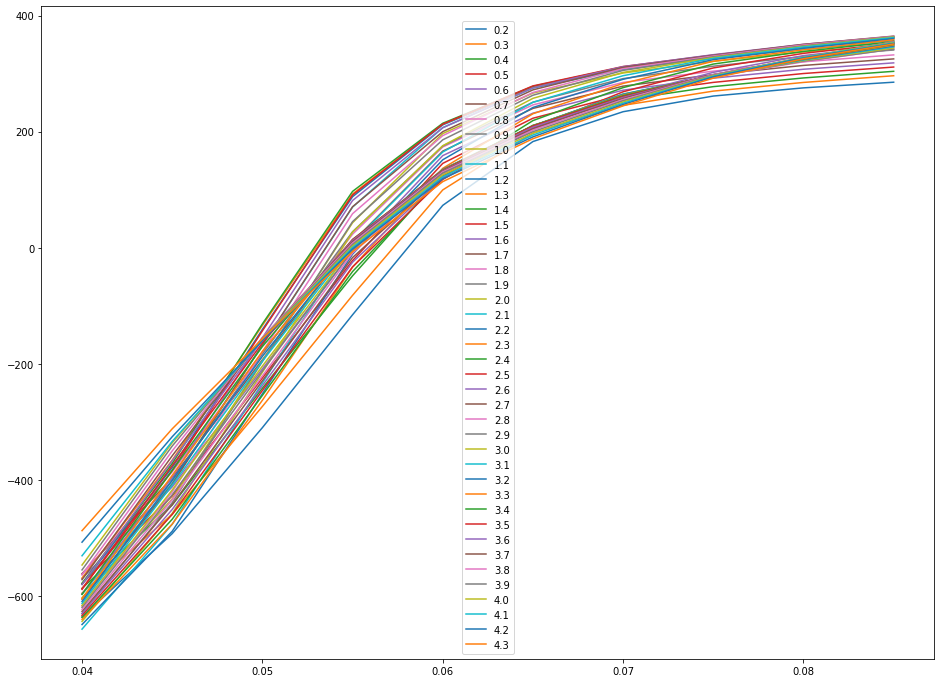

In [208]:
# Euler as a function of rho for several temperatures
dfpp = pd.DataFrame(aDictpp)
dfpp.plot(figsize=(16, 12))

Text(0.5, 0, 'Euler number')

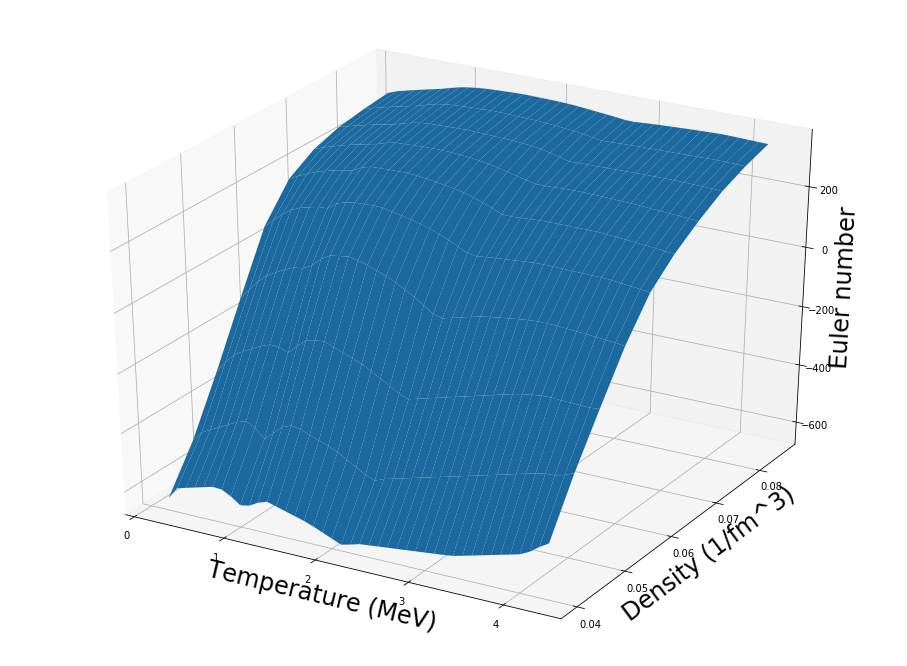

In [209]:
## prop = 0.1
xx = dfpp.columns
yy = dfpp.index
XX,YY = np.meshgrid(xx,yy)
ZZ = dfpp.values
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(XX, YY, ZZ)
ax.set_xlabel('Temperature (MeV)', fontsize=24)
ax.set_ylabel('Density (1/fm^3)', fontsize=24)
ax.set_zlabel('Euler number', fontsize=24)

In [210]:
prop = 0.1
aDictpp = {}
for temp in range(2, 44):
    Tpp = temp/10.0
    aList = []
    for rho in rho_vals:
        aList.append(np.asscalar(c_clf.predict([[Tpp, rho, prop]])))
    aDictpp[Tpp] = pd.Series(aList, index=rho_vals)

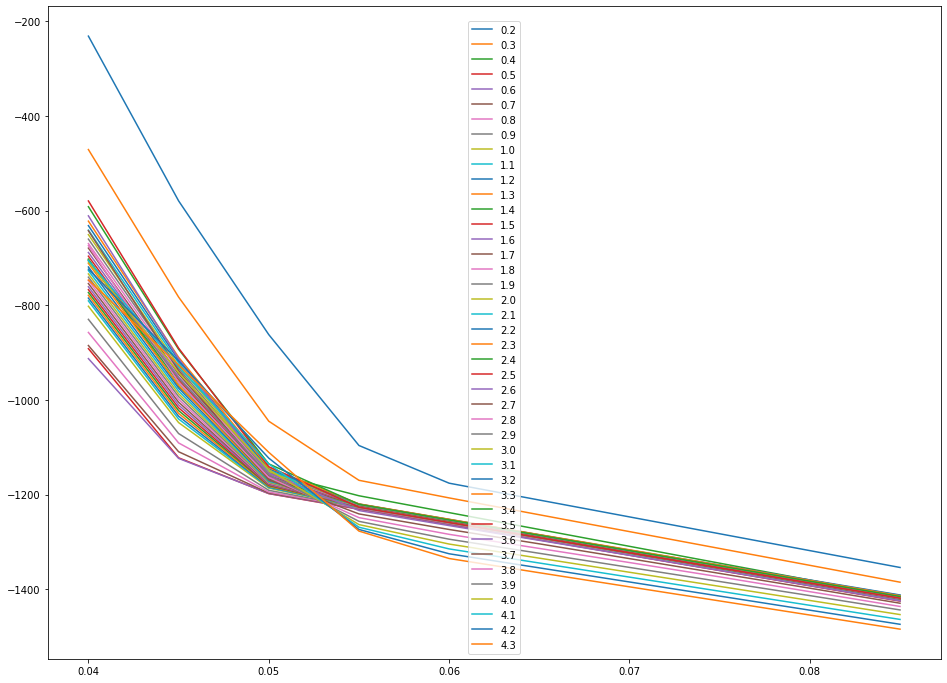

In [211]:
# Curvature as a function of rho for several temperatures
dfpp = pd.DataFrame(aDictpp)
dfpp.plot(figsize=(16, 12))

Text(0.5, 0, 'Curvature')

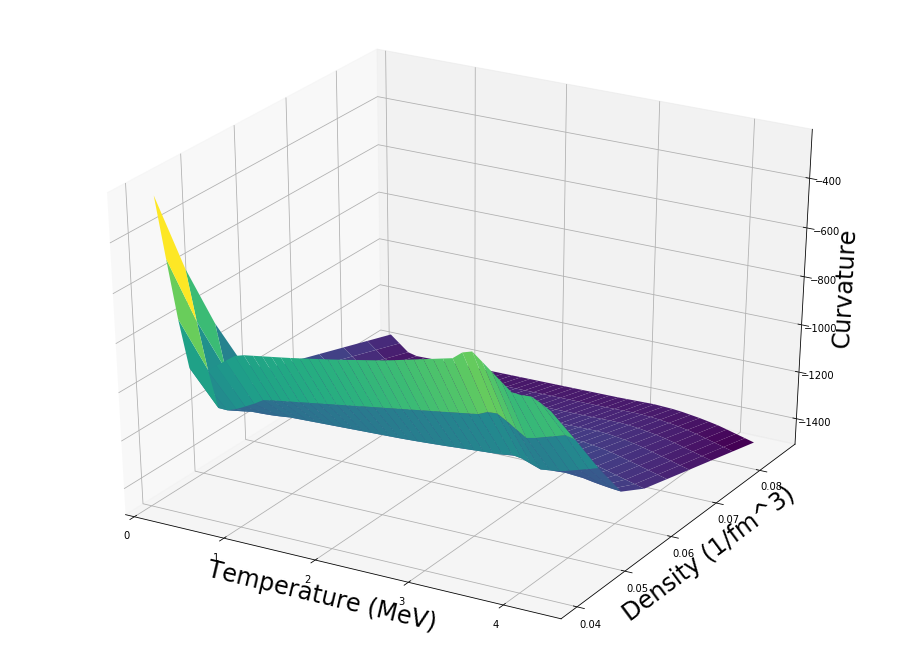

In [212]:
## prop = 0.1
xx = dfpp.columns
yy = dfpp.index
XX,YY = np.meshgrid(xx,yy)
ZZ = dfpp.values
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(XX, YY, ZZ, cmap='viridis')
ax.set_xlabel('Temperature (MeV)', fontsize=24)
ax.set_ylabel('Density (1/fm^3)', fontsize=24)
ax.set_zlabel('Curvature', fontsize=24)

In [217]:
prop = 0.2

In [218]:
prop = 0.2
aDictpp = {}
for temp in range(2, 44):
    Tpp = temp/10.0
    aList = []
    for rho in rho_vals:
        aList.append(np.asscalar(e_clf.predict([[Tpp, rho, prop]])))
    aDictpp[Tpp] = pd.Series(aList, index=rho_vals)

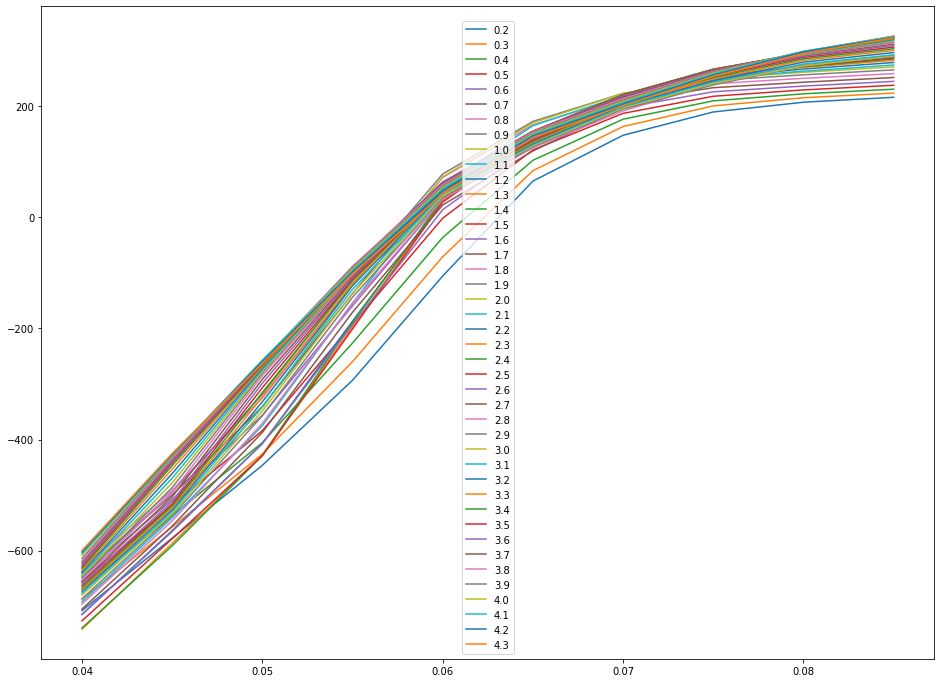

In [219]:
# Euler as a function of rho for several temperatures
dfpp = pd.DataFrame(aDictpp)
dfpp.plot(figsize=(16, 12))

Text(0.5, 0, 'Euler number')

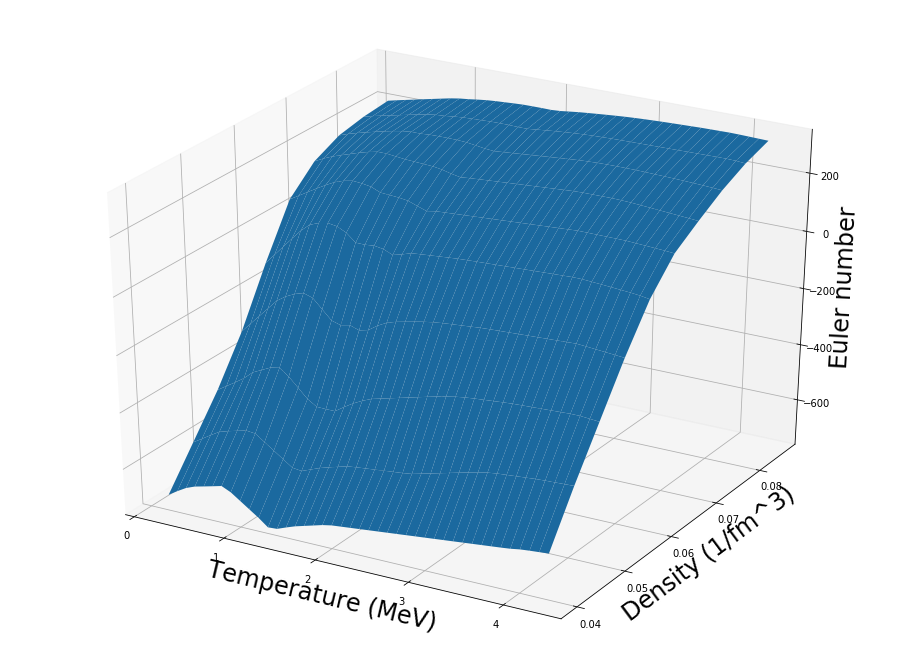

In [220]:
## prop = 0.2
xx = dfpp.columns
yy = dfpp.index
XX,YY = np.meshgrid(xx,yy)
ZZ = dfpp.values
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(XX, YY, ZZ)
ax.set_xlabel('Temperature (MeV)', fontsize=24)
ax.set_ylabel('Density (1/fm^3)', fontsize=24)
ax.set_zlabel('Euler number', fontsize=24)

In [221]:
prop = 0.2
aDictpp = {}
for temp in range(2, 44):
    Tpp = temp/10.0
    aList = []
    for rho in rho_vals:
        aList.append(np.asscalar(c_clf.predict([[Tpp, rho, prop]])))
    aDictpp[Tpp] = pd.Series(aList, index=rho_vals)

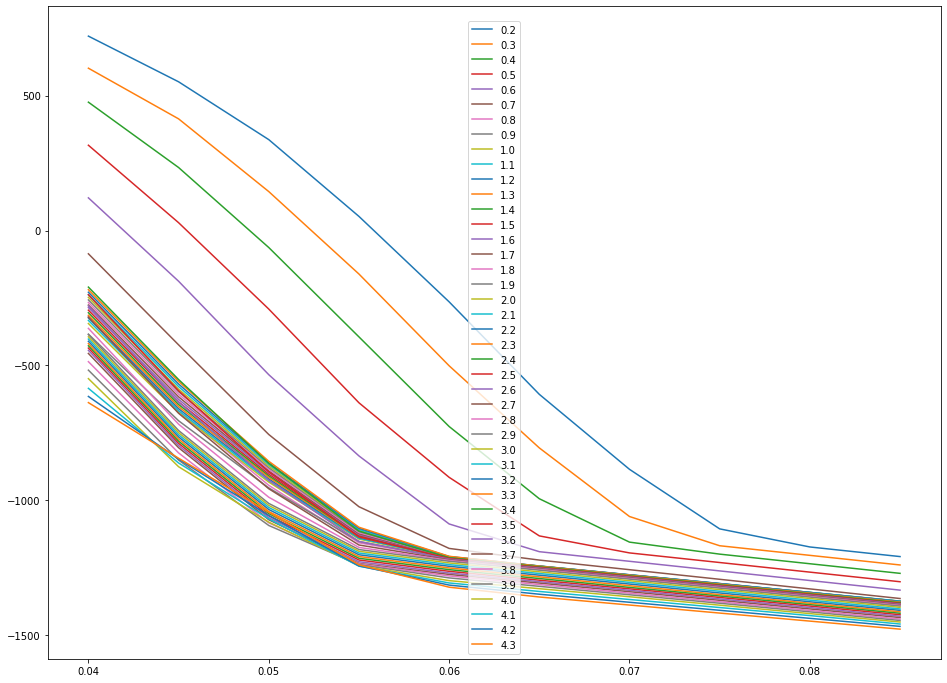

In [222]:
# Curvature as a function of rho for several temperatures
dfpp = pd.DataFrame(aDictpp)
dfpp.plot(figsize=(16, 12))

Text(0.5, 0, 'Curvature')

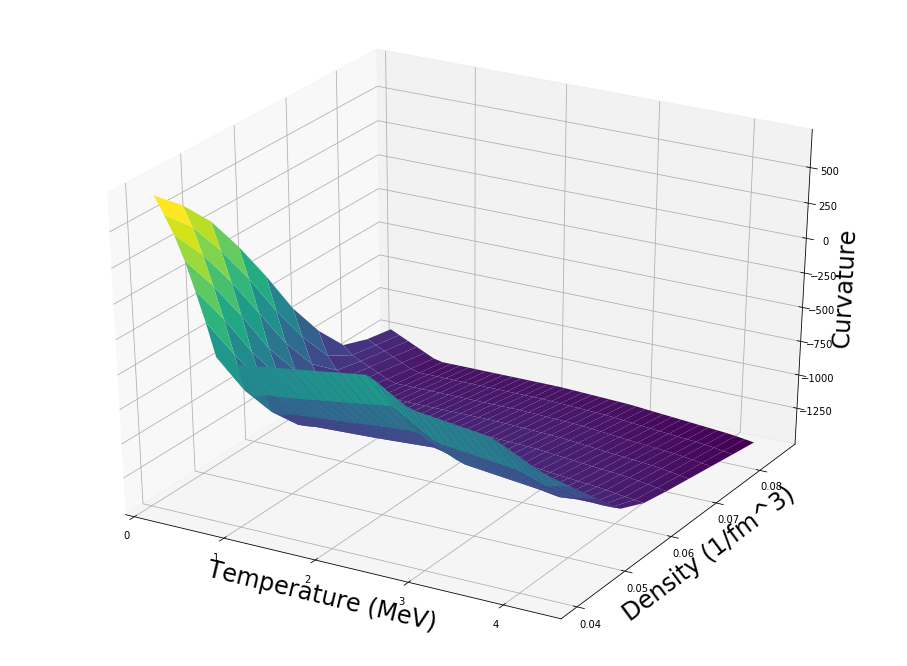

In [223]:
## prop = 0.2
xx = dfpp.columns
yy = dfpp.index
XX,YY = np.meshgrid(xx,yy)
ZZ = dfpp.values
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(XX, YY, ZZ, cmap='viridis')
ax.set_xlabel('Temperature (MeV)', fontsize=24)
ax.set_ylabel('Density (1/fm^3)', fontsize=24)
ax.set_zlabel('Curvature', fontsize=24)

In [224]:
prop = 0.3

In [225]:
aDict = {}
for temp in [1.0, 2.0, 3.0, 4.0]:
    aList = []
    for rho in rho_vals:
        aList.append(np.asscalar(e_clf.predict([[temp, rho, prop]])))
    aDict[temp] = pd.Series(aList, index=rho_vals)

In [226]:
prop = 0.3
aDictpp = {}
for temp in range(2, 44):
    Tpp = temp/10.0
    aList = []
    for rho in rho_vals:
        aList.append(np.asscalar(e_clf.predict([[Tpp, rho, prop]])))
    aDictpp[Tpp] = pd.Series(aList, index=rho_vals)

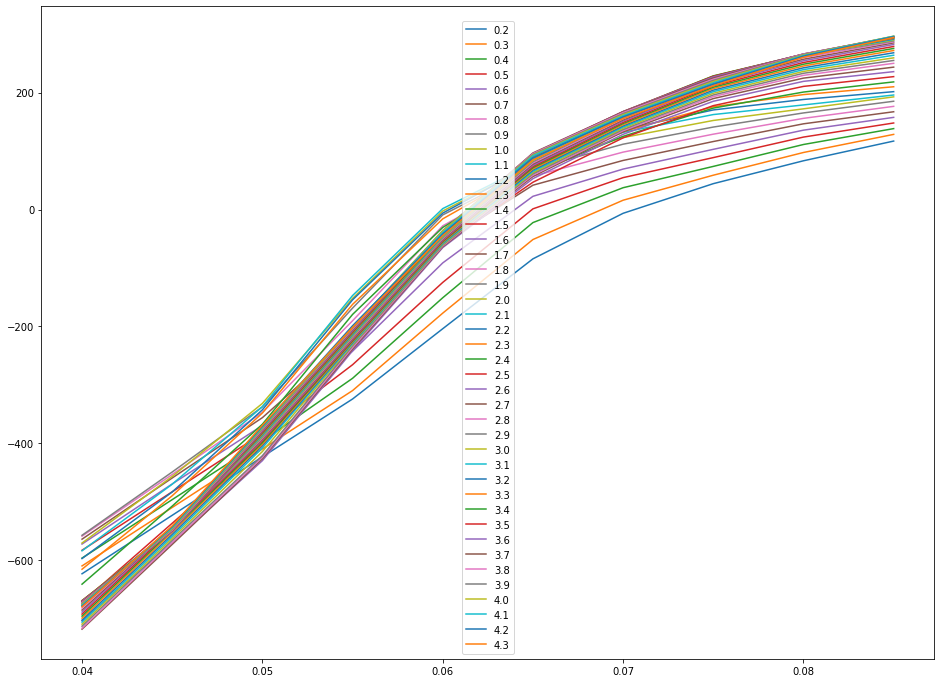

In [227]:
# Euler as a function of rho for several temperatures
dfpp = pd.DataFrame(aDictpp)
dfpp.plot(figsize=(16, 12))

Text(0.5, 0, 'Euler number')

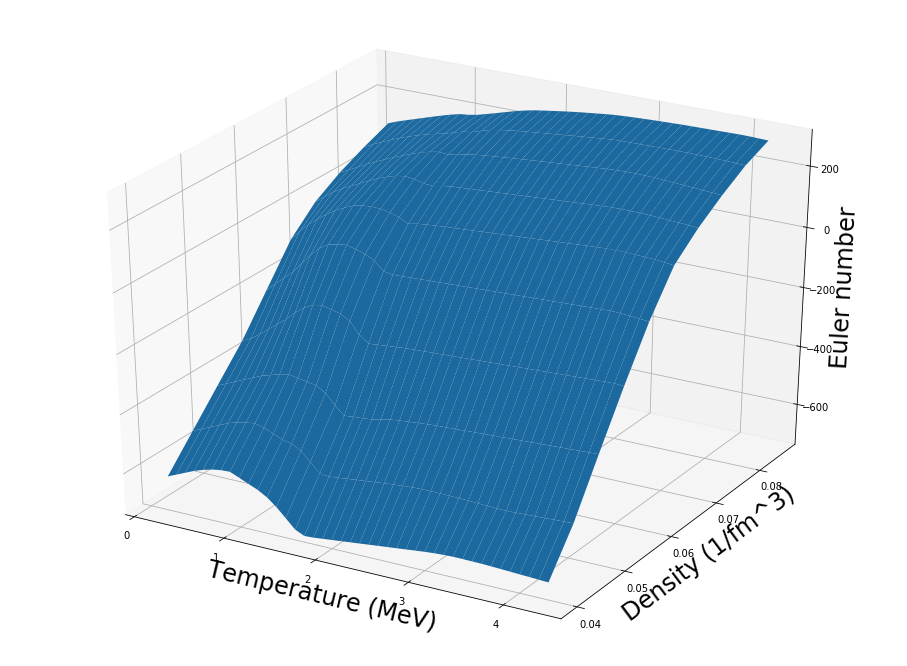

In [228]:
## prop = 0.3
xx = dfpp.columns
yy = dfpp.index
XX,YY = np.meshgrid(xx,yy)
ZZ = dfpp.values
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(XX, YY, ZZ)
ax.set_xlabel('Temperature (MeV)', fontsize=24)
ax.set_ylabel('Density (1/fm^3)', fontsize=24)
ax.set_zlabel('Euler number', fontsize=24)

In [246]:
prop = 0.3
aDictpp = {}
for temp in range(2, 44):
    Tpp = temp/10.0
    aList = []
    for rho in rho_vals:
        aList.append(np.asscalar(c_clf.predict([[Tpp, rho, prop]])))
    aDictpp[Tpp] = pd.Series(aList, index=rho_vals)

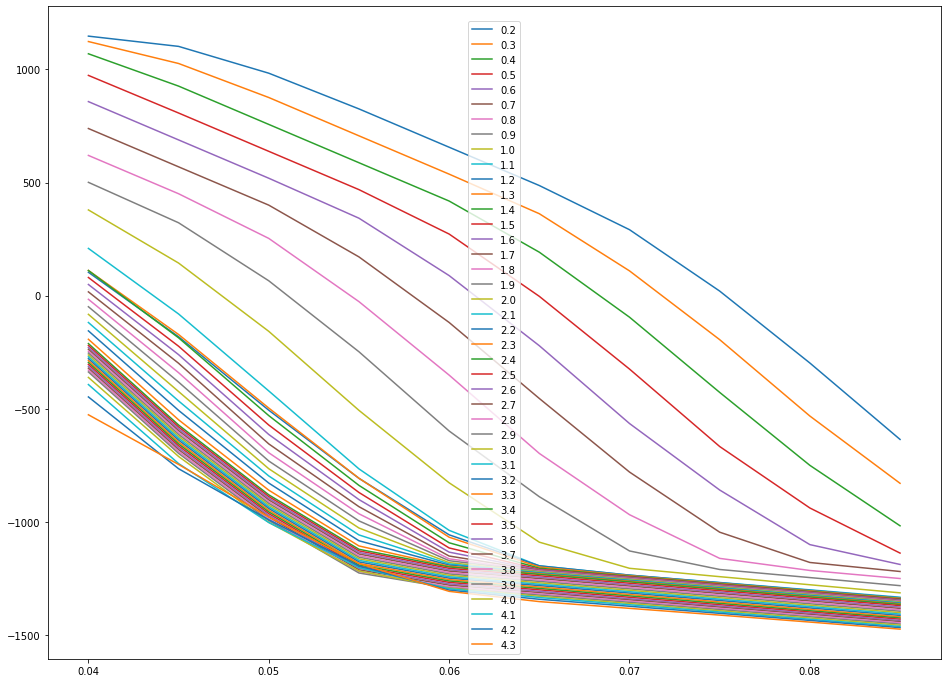

In [247]:
# Curvature as a function of rho for several temperatures
dfpp = pd.DataFrame(aDictpp)
dfpp.plot(figsize=(16, 12))

Text(0.5, 0, 'Curvature')

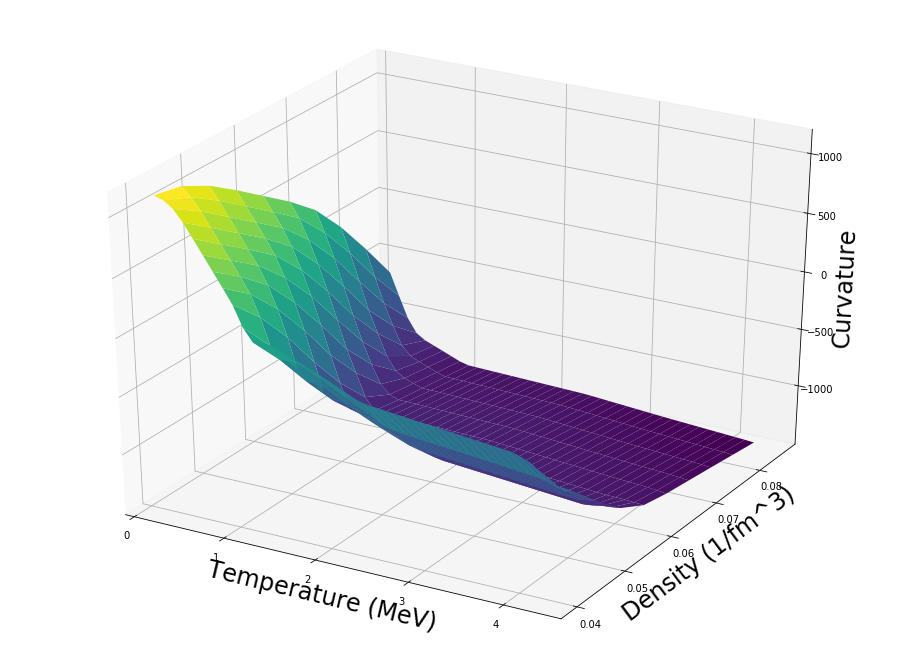

In [248]:
## prop = 0.3
xx = dfpp.columns
yy = dfpp.index
XX,YY = np.meshgrid(xx,yy)
ZZ = dfpp.values
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(XX, YY, ZZ, cmap='viridis')
ax.set_xlabel('Temperature (MeV)', fontsize=24)
ax.set_ylabel('Density (1/fm^3)', fontsize=24)
ax.set_zlabel('Curvature', fontsize=24)

In [232]:
prop = 0.4
aDict = {}
for temp in [2.0, 3.0, 4.0]:
    aList = []
    for rho in rho_vals:
        aList.append(np.asscalar(e_clf.predict([[temp, rho, prop]])))
    aDict[temp] = pd.Series(aList, index=rho_vals)
    
df = pd.DataFrame(aDict)

In [233]:
prop = 0.4
aDictpp = {}
for temp in range(2, 44):
    Tpp = temp/10.0
    aList = []
    for rho in rho_vals:
        aList.append(np.asscalar(e_clf.predict([[Tpp, rho, prop]])))
    aDictpp[Tpp] = pd.Series(aList, index=rho_vals)

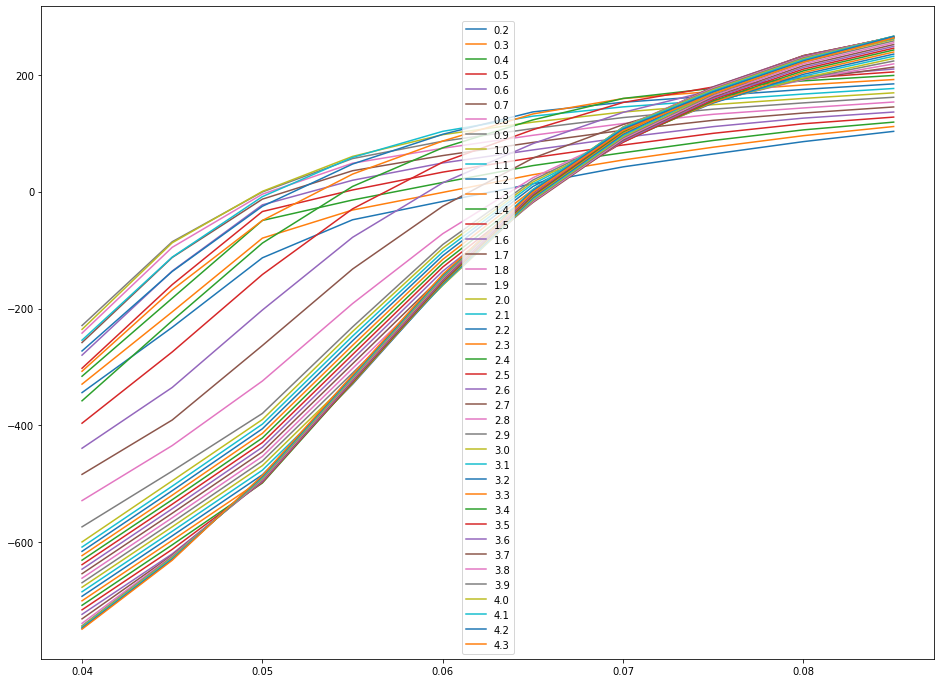

In [234]:
# Euler as a function of rho for several temperatures
dfpp = pd.DataFrame(aDictpp)
dfpp.plot(figsize=(16, 12))

Text(0.5, 0, 'Euler number')

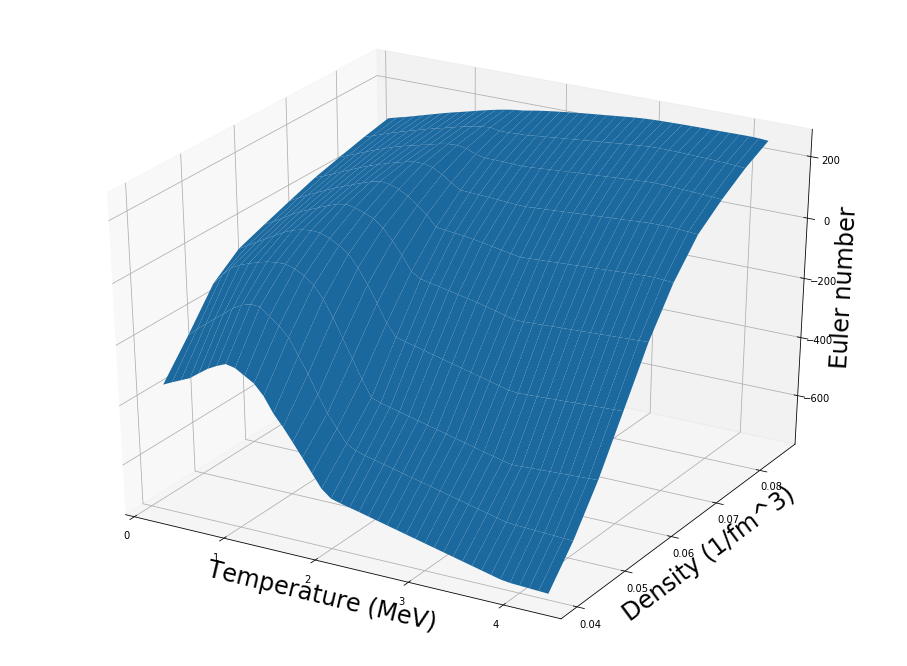

In [235]:
## prop = 0.4
xx = dfpp.columns
yy = dfpp.index
XX,YY = np.meshgrid(xx,yy)
ZZ = dfpp.values
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(XX, YY, ZZ)
ax.set_xlabel('Temperature (MeV)', fontsize=24)
ax.set_ylabel('Density (1/fm^3)', fontsize=24)
ax.set_zlabel('Euler number', fontsize=24)

In [249]:
prop = 0.4
aDictpp = {}
for temp in range(2, 44):
    Tpp = temp/10.0
    aList = []
    for rho in rho_vals:
        aList.append(np.asscalar(c_clf.predict([[Tpp, rho, prop]])))
    aDictpp[Tpp] = pd.Series(aList, index=rho_vals)

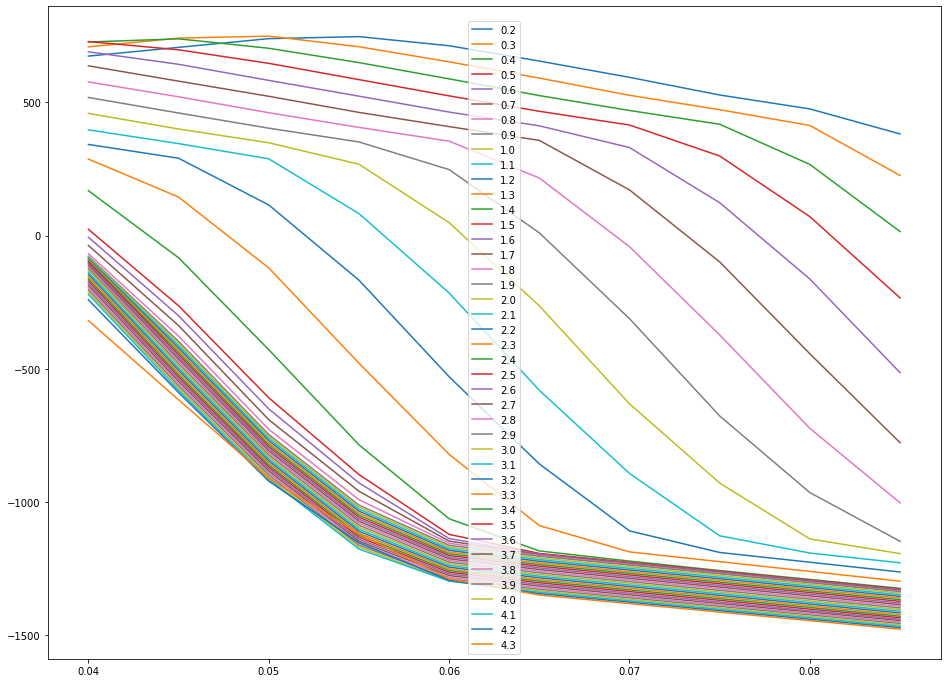

In [250]:
# Curvature as a function of rho for several temperatures
dfpp = pd.DataFrame(aDictpp)
dfpp.plot(figsize=(16, 12))

Text(0.5, 0, 'Curvature')

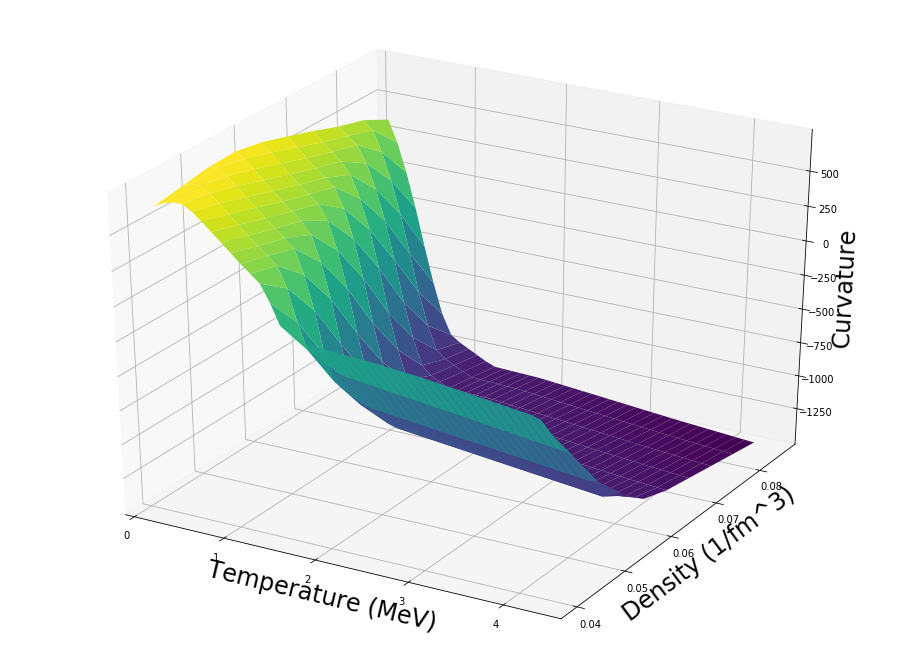

In [251]:
## prop = 0.4
xx = dfpp.columns
yy = dfpp.index
XX,YY = np.meshgrid(xx,yy)
ZZ = dfpp.values
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(XX, YY, ZZ, cmap='viridis')
ax.set_xlabel('Temperature (MeV)', fontsize=24)
ax.set_ylabel('Density (1/fm^3)', fontsize=24)
ax.set_zlabel('Curvature', fontsize=24)

In [239]:
prop = 0.5
aDict = {}
for temp in [2.0, 3.0, 4.0]:
    aList = []
    for rho in rho_vals:
        aList.append(np.asscalar(e_clf.predict([[temp, rho, prop]])))
    aDict[temp] = pd.Series(aList, index=rho_vals)
    
df = pd.DataFrame(aDict)

In [240]:
prop = 0.5
aDictpp = {}
for temp in range(2, 44):
    Tpp = temp/10.0
    aList = []
    for rho in rho_vals:
        aList.append(np.asscalar(e_clf.predict([[Tpp, rho, prop]])))
    aDictpp[Tpp] = pd.Series(aList, index=rho_vals)

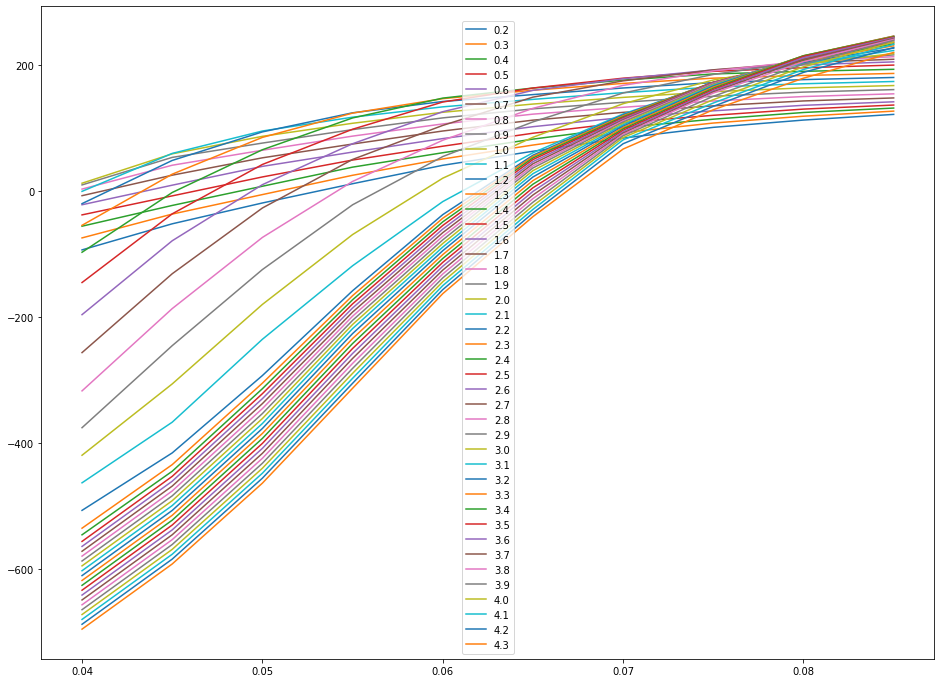

In [241]:
# Euler as a function of rho for several temperatures
dfpp = pd.DataFrame(aDictpp)
dfpp.plot(figsize=(16, 12))

Text(0.5, 0, 'Euler number')

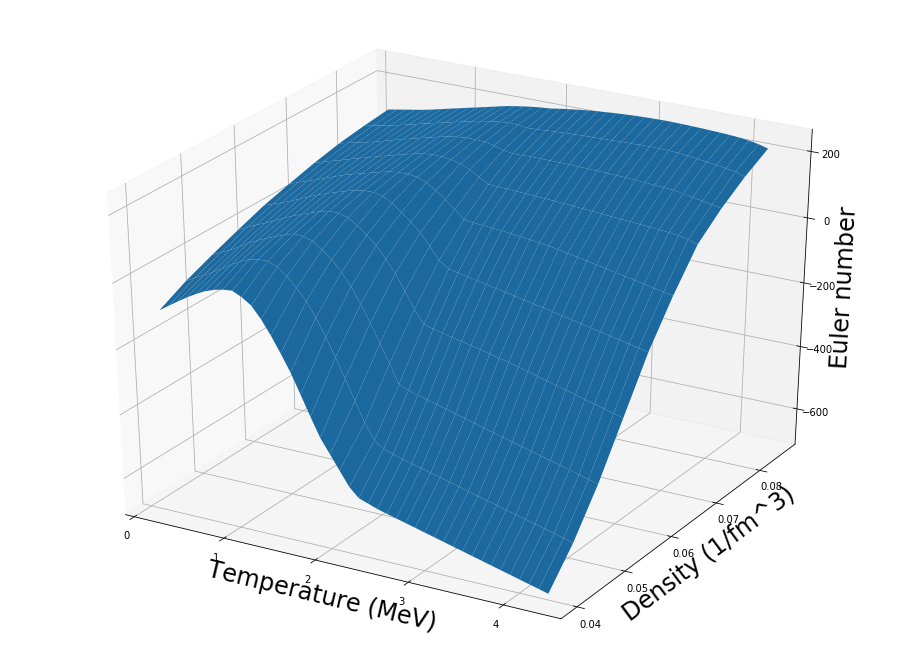

In [242]:
## prop = 0.5
xx = dfpp.columns
yy = dfpp.index
XX,YY = np.meshgrid(xx,yy)
ZZ = dfpp.values
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(XX, YY, ZZ)
ax.set_xlabel('Temperature (MeV)', fontsize=24)
ax.set_ylabel('Density (1/fm^3)', fontsize=24)
ax.set_zlabel('Euler number', fontsize=24)

In [252]:
prop = 0.5
aDictpp = {}
for temp in range(2, 44):
    Tpp = temp/10.0
    aList = []
    for rho in rho_vals:
        aList.append(np.asscalar(c_clf.predict([[Tpp, rho, prop]])))
    aDictpp[Tpp] = pd.Series(aList, index=rho_vals)

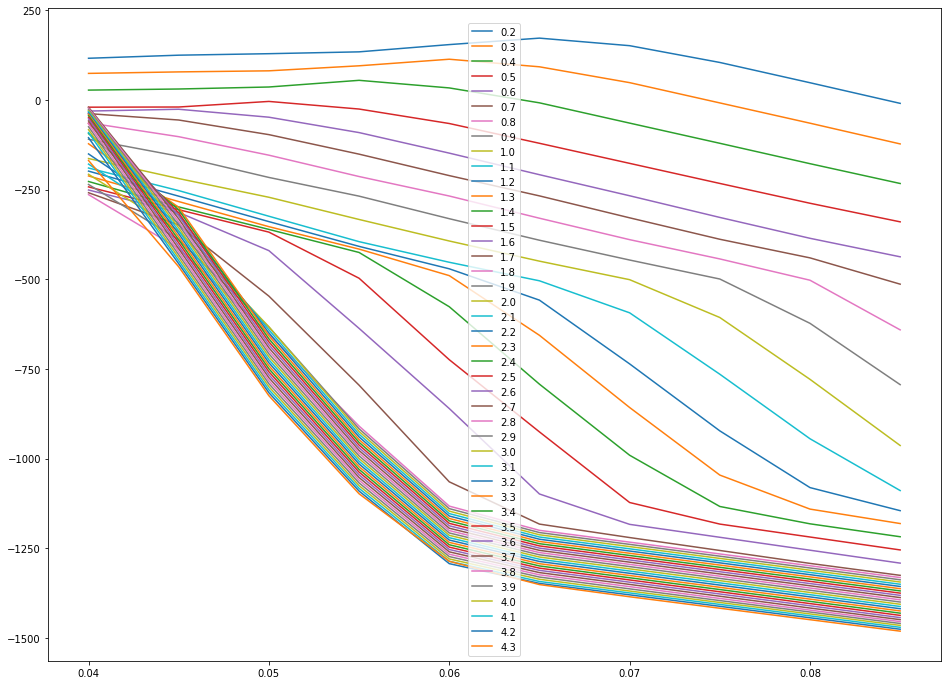

In [253]:
# Curvature as a function of rho for several temperatures
dfpp = pd.DataFrame(aDictpp)
dfpp.plot(figsize=(16, 12))

Text(0.5, 0, 'Curvature')

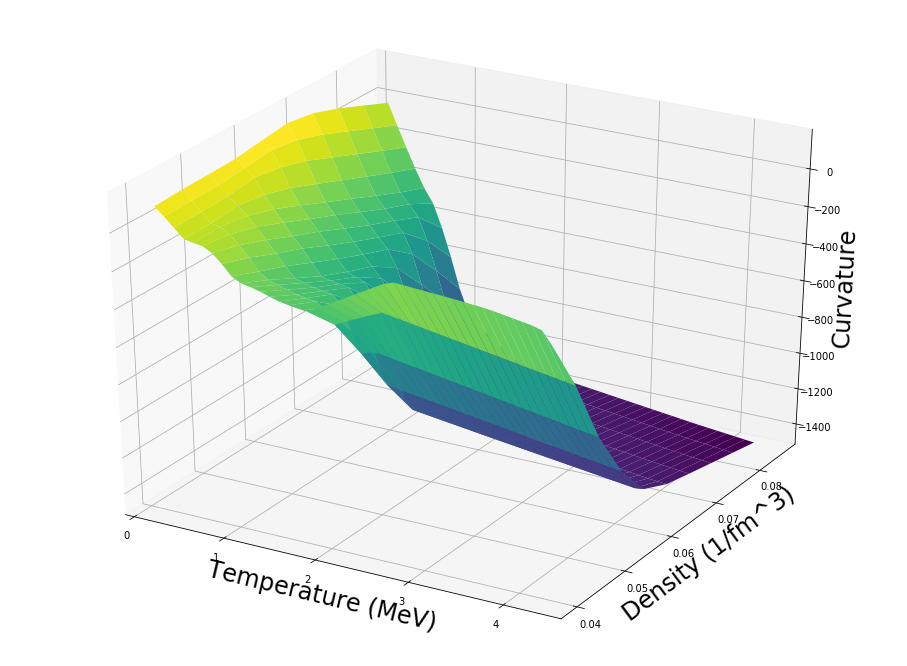

In [254]:
## prop = 0.5
xx = dfpp.columns
yy = dfpp.index
XX,YY = np.meshgrid(xx,yy)
ZZ = dfpp.values
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(XX, YY, ZZ, cmap='viridis')
ax.set_xlabel('Temperature (MeV)', fontsize=24)
ax.set_ylabel('Density (1/fm^3)', fontsize=24)
ax.set_zlabel('Curvature', fontsize=24)

In [189]:
def generate_phase_diagram_data(rho, c_model, e_model):
    data = []
    for p in range(10, 51, 2):
        prop = p/100.0
        for tt in range(2, 44):
            t = tt/10.0
            c = c_model.predict([[t, rho, prop]])[0]
            e = e_model.predict([[t, rho, prop]])[0]
            #c = c_clf.predict([[t, rho, prop]])[0]
            #e = e_clf.predict([[t, rho, prop]])[0]
            phase = None
            if 0 < c and 0 < e:
                #phase = 'Gnocchi'
                phase = 'G'
            elif 0 > c and 0 < e:
                #phase = 'Anti-Gnocchi'
                phase = 'AG'
            elif 0 > c and 0 > e:
                #phase = 'Anti-Jungle-gym'
                phase = 'AJ'
            elif 0 < c and 0 > e:
                #phase = 'Jungle-gym'
                phase = 'J'
            else:
                print('Weird')
        
            data.append([phase, prop, t])
            #print(prop, t, c, e, phase)
    return data

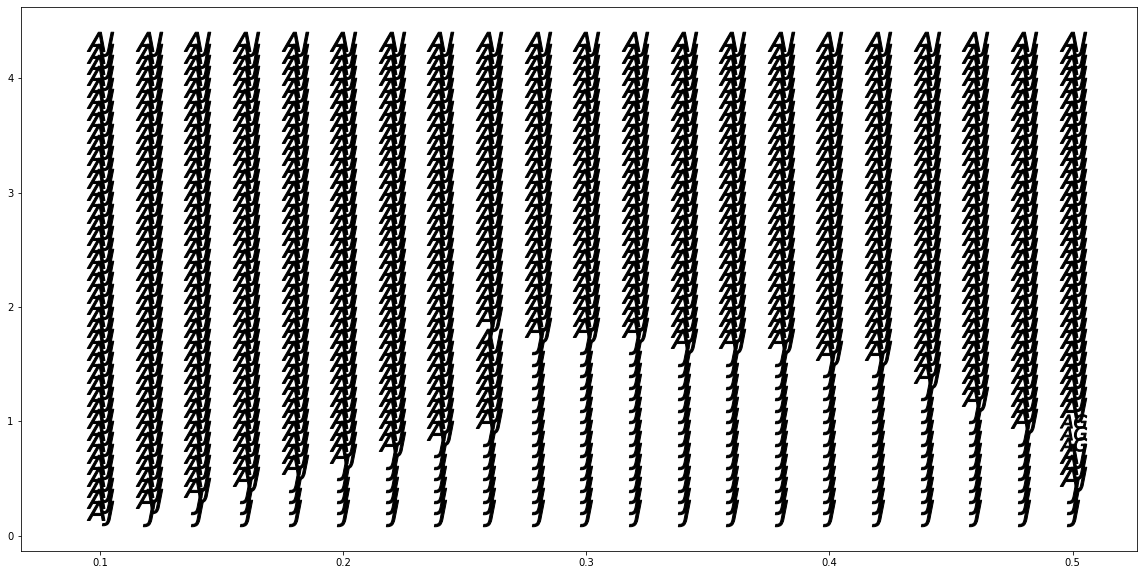

In [192]:
#rho = 0.04
data = generate_phase_diagram_data(0.04, c_clf, e_clf)
plt.figure(figsize=(20,10))
for item in data:
    plt.scatter(item[1], item[2], s=700, c='black', marker=r"$ {} $".format(item[0]))

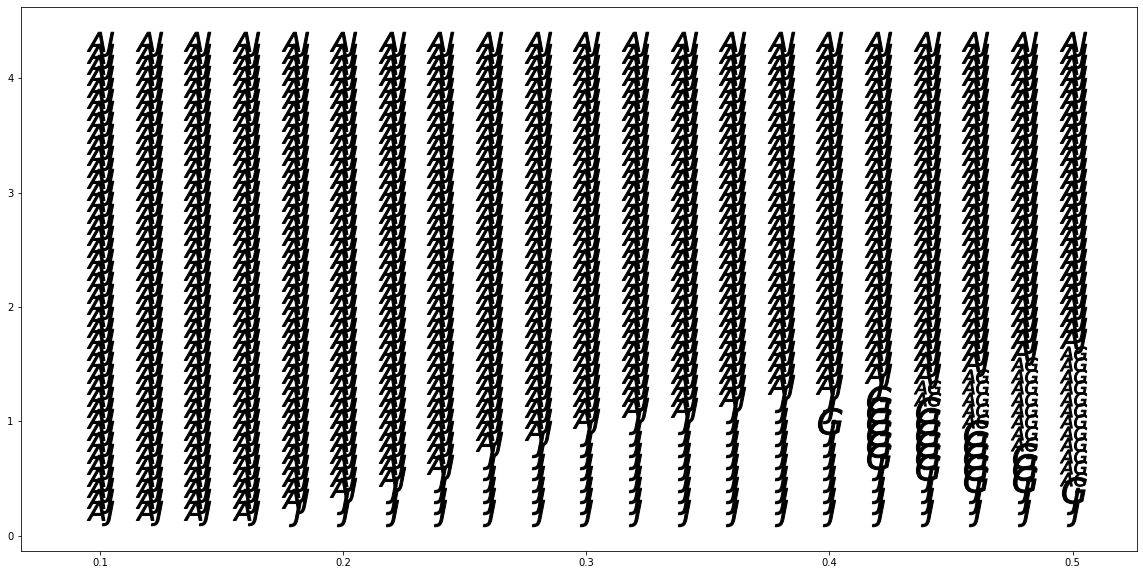

In [193]:
#rho = 0.05
data = generate_phase_diagram_data(0.05, c_clf, e_clf)
plt.figure(figsize=(20,10))
for item in data:
    plt.scatter(item[1], item[2], s=700, c='black', marker=r"$ {} $".format(item[0]))

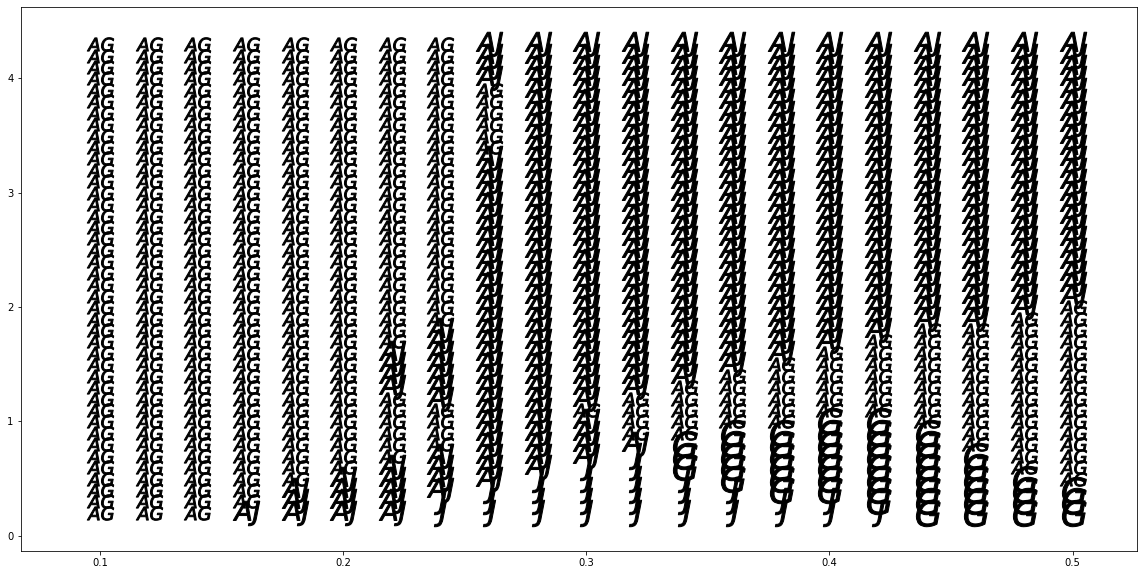

In [194]:
#rho = 0.06
data = generate_phase_diagram_data(0.06, c_clf, e_clf)
plt.figure(figsize=(20,10))
for item in data:
    plt.scatter(item[1], item[2], s=700, c='black', marker=r"$ {} $".format(item[0]))

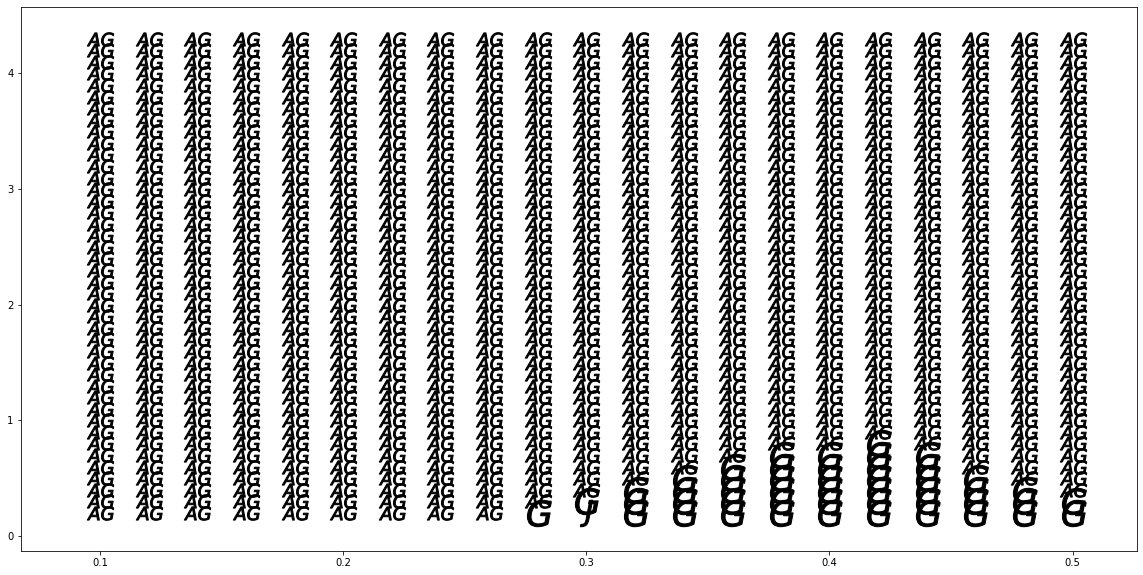

In [195]:
#rho = 0.07
data = generate_phase_diagram_data(0.07, c_clf, e_clf)
plt.figure(figsize=(20,10))
for item in data:
    plt.scatter(item[1], item[2], s=700, c='black', marker=r"$ {} $".format(item[0]))

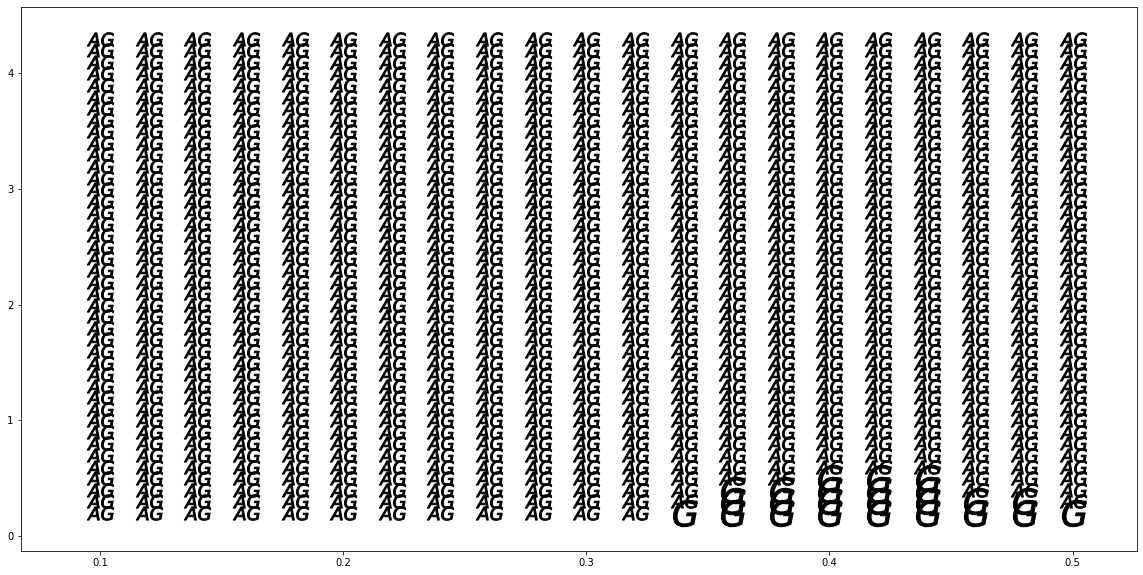

In [196]:
#rho = 0.08
data = generate_phase_diagram_data(0.08, c_clf, e_clf)
plt.figure(figsize=(20,10))
for item in data:
    plt.scatter(item[1], item[2], s=700, c='black', marker=r"$ {} $".format(item[0]))

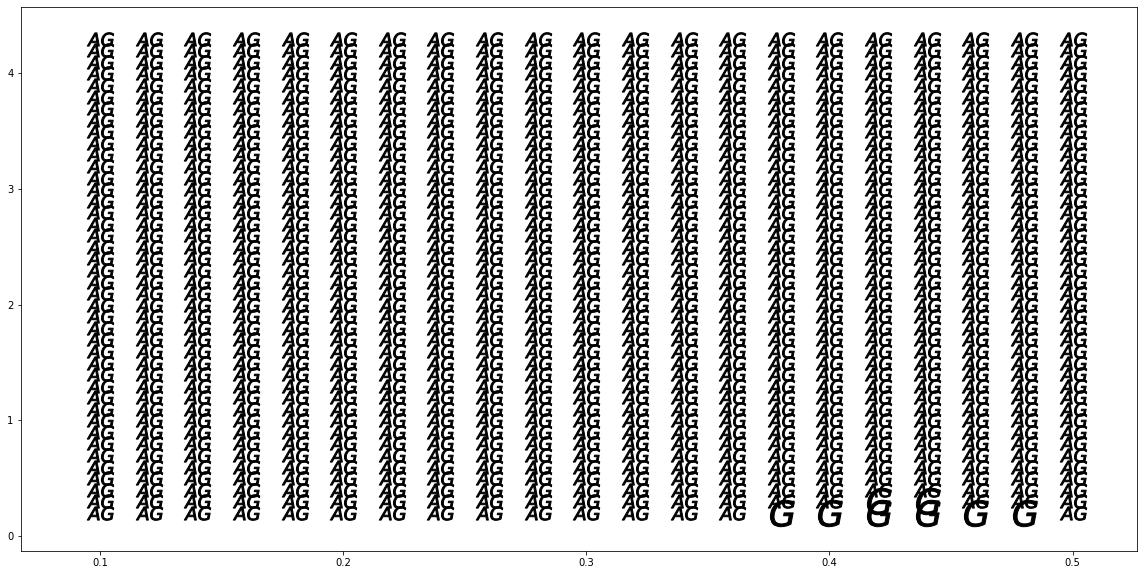

In [197]:
#rho = 0.09
data = generate_phase_diagram_data(0.09, c_clf, e_clf)
plt.figure(figsize=(20,10))
for item in data:
    plt.scatter(item[1], item[2], s=700, c='black', marker=r"$ {} $".format(item[0]))